# Classification problem using NN in Keras
### From loan record of bank customers ,predicting whether they will repay a loan or not

In [697]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [698]:
data=pd.read_csv("data\lending_club_loan_two.csv")

In [699]:
df=pd.DataFrame(data)

In [700]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


C:\Users\svsma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_status', ylabel='count'>

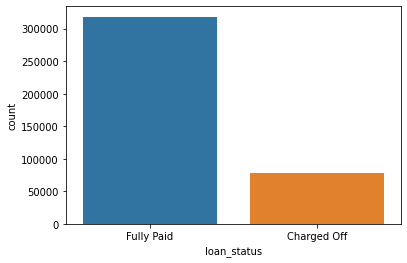

In [701]:
sns.countplot(df['loan_status'])

C:\Users\svsma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loan_amnt'>

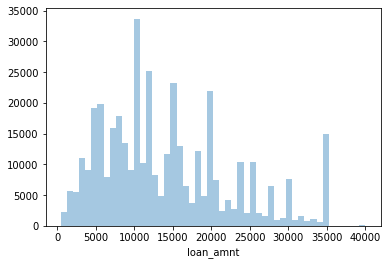

In [702]:
sns.distplot(df['loan_amnt'],kde=False)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

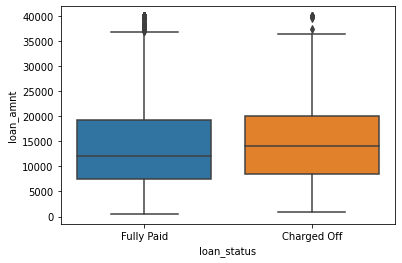

In [703]:
sns.boxplot(y='loan_amnt',x='loan_status',data=df)

<AxesSubplot:xlabel='loan_status', ylabel='int_rate'>

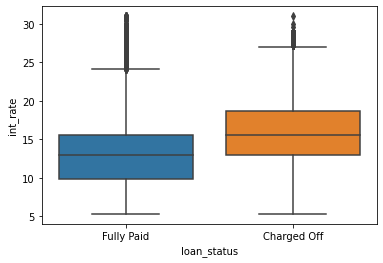

In [704]:
sns.boxplot(y='int_rate',x='loan_status',data=df)

In [705]:
df['loan_status']=df['loan_status'].apply(lambda x:1 if x=="Fully Paid" else 0)

In [706]:
abs(df.corr()['loan_status']).sort_values()

pub_rec_bankruptcies    0.009383
revol_bal               0.010892
total_acc               0.017893
pub_rec                 0.019933
open_acc                0.028012
installment             0.041082
annual_inc              0.053432
loan_amnt               0.059836
dti                     0.062413
mort_acc                0.073111
revol_util              0.082373
int_rate                0.247758
loan_status             1.000000
Name: loan_status, dtype: float64

<AxesSubplot:>

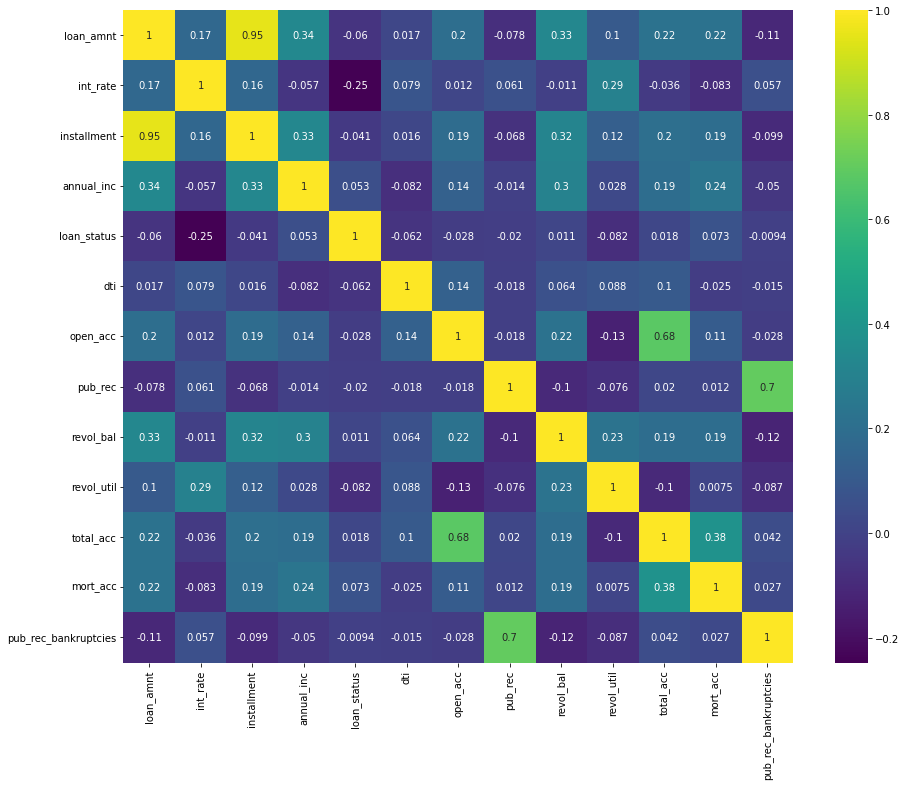

In [707]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),cmap='viridis',annot=True)

In [708]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
1,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


C:\Users\svsma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='home_ownership', ylabel='count'>

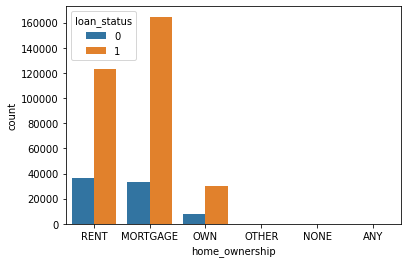

In [709]:
sns.countplot(df['home_ownership'],hue=df['loan_status'])

C:\Users\svsma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sub_grade', ylabel='count'>

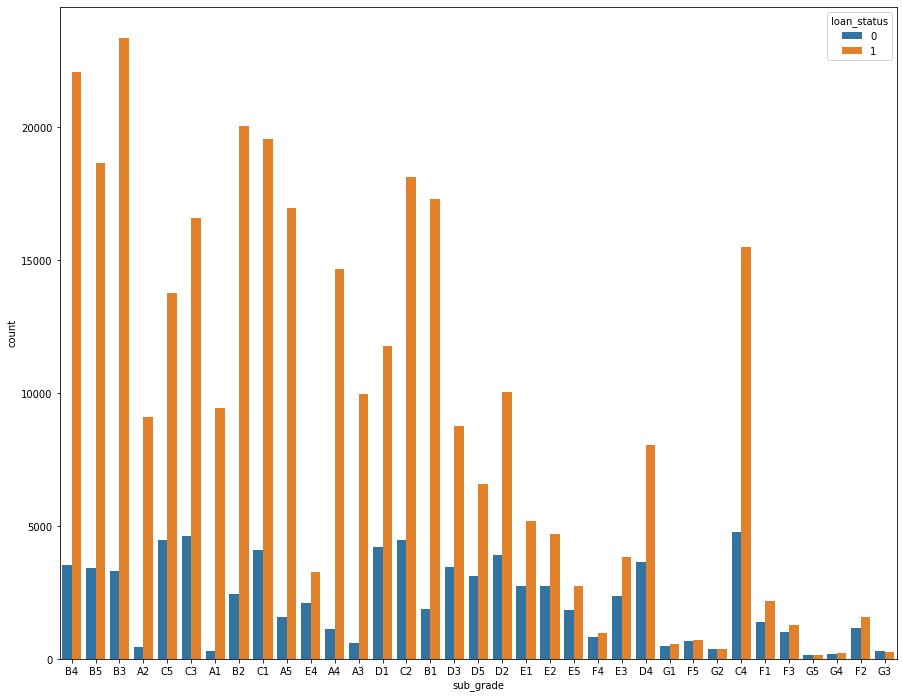

In [710]:
plt.figure(figsize=(15,12))

sns.countplot(df['sub_grade'],hue=df['loan_status'])

C:\Users\svsma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pub_rec', ylabel='count'>

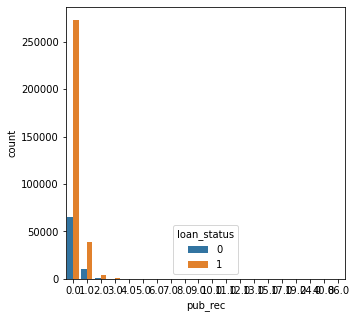

In [711]:
plt.figure(figsize=(5,5))

sns.countplot(df['pub_rec'],hue=df['loan_status'])

<AxesSubplot:xlabel='loan_amnt', ylabel='installment'>

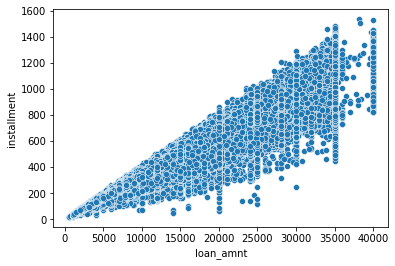

In [712]:
sns.scatterplot(x='loan_amnt',y='installment',data=df)

C:\Users\svsma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='home_ownership', ylabel='count'>

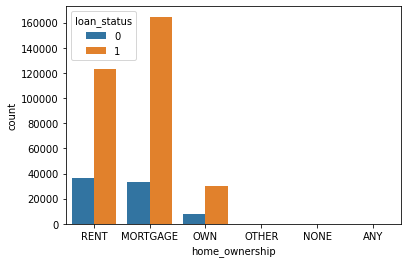

In [713]:
sns.countplot(df['home_ownership'],hue=df['loan_status'])

In [714]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

C:\Users\svsma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sub_grade', ylabel='count'>

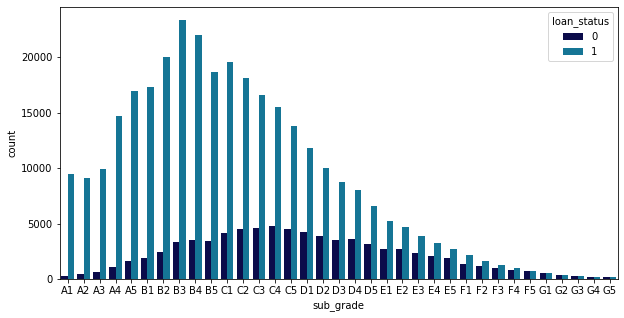

In [715]:
plt.figure(figsize=(10,5))
#sns.color_palette("mako", as_cmap=True)
#sns.color_palette("magma", as_cmap=True)

sns.countplot(df['sub_grade'].sort_values(),hue=df['loan_status'],palette="ocean")

In [716]:
fg=df[(df['grade']=='F') | (df['grade']=="G")]

C:\Users\svsma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sub_grade', ylabel='count'>

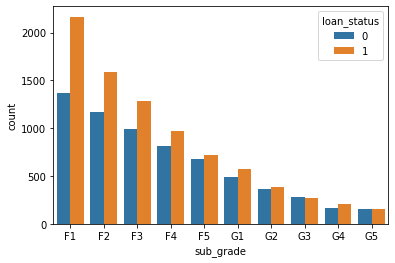

In [717]:
sns.countplot(fg['sub_grade'].sort_values(),hue=fg['loan_status'],)

<AxesSubplot:>

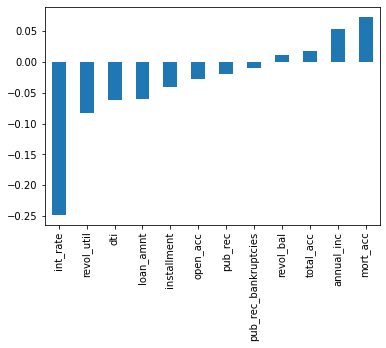

In [718]:
df.corr()['loan_status'].sort_values().drop('loan_status').plot(kind='bar')

In [719]:
(100*df.isnull().sum()/len(df)).sort_values()

loan_amnt               0.000000
application_type        0.000000
initial_list_status     0.000000
total_acc               0.000000
revol_bal               0.000000
pub_rec                 0.000000
open_acc                0.000000
earliest_cr_line        0.000000
dti                     0.000000
loan_status             0.000000
issue_d                 0.000000
purpose                 0.000000
annual_inc              0.000000
home_ownership          0.000000
sub_grade               0.000000
grade                   0.000000
installment             0.000000
int_rate                0.000000
term                    0.000000
verification_status     0.000000
address                 0.000000
revol_util              0.069692
pub_rec_bankruptcies    0.135091
title                   0.443148
emp_length              4.621115
emp_title               5.789208
mort_acc                9.543469
dtype: float64

In [720]:
df=df.drop('emp_title',axis=1)

C:\Users\svsma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='emp_length', ylabel='count'>

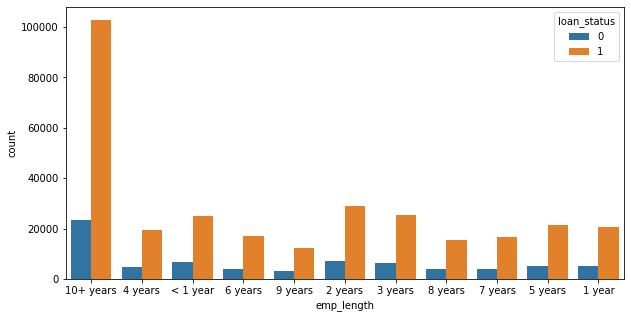

In [721]:
plt.figure(figsize=(10,5))

sns.countplot(df['emp_length'],hue=df['loan_status'])

In [722]:
n=df[df['loan_status']==1].groupby('emp_length').count()['loan_status']

In [723]:
d=df[df['loan_status']==0].groupby('emp_length').count()['loan_status']


In [724]:
p=d/n

<AxesSubplot:xlabel='emp_length'>

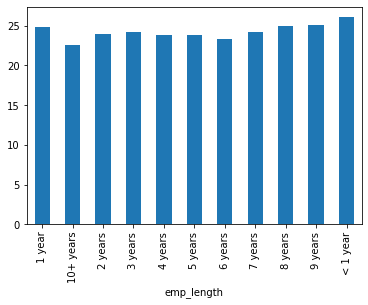

In [725]:
(p*100).plot(kind='bar')


In [726]:
df=df.drop('emp_length',axis=1)

In [727]:
df=df.drop('title',axis=1)

C:\Users\svsma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mort_acc', ylabel='count'>

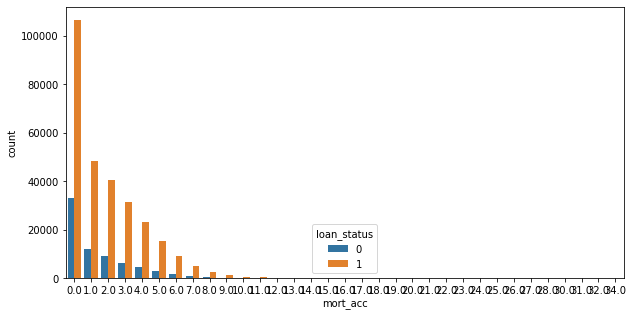

In [728]:
plt.figure(figsize=(10,5))

sns.countplot(df['mort_acc'],hue=df['loan_status'])

In [729]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [730]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_status             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [731]:
#Mean of mort_acc column per total_acc
mort_avg=df.groupby('total_acc').mean()['mort_acc']

In [732]:
mort_avg[3]

0.05202312138728324

In [733]:
def fill_mort_acc(total_acc,mort_acc):

    if np.isnan(mort_acc):
        return mort_avg[total_acc]
    else:
        return mort_acc

In [734]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

C:\Users\svsma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='count'>

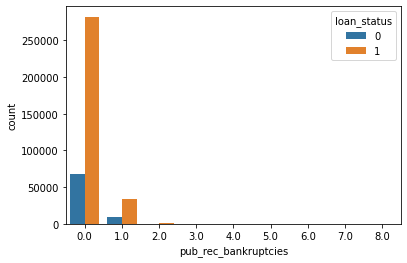

In [735]:
sns.countplot(df['pub_rec_bankruptcies'],hue='loan_status',data=df)

In [736]:
df[df['loan_status']==1].groupby('pub_rec_bankruptcies')['loan_status'].count()

pub_rec_bankruptcies
0.0    282059
1.0     34063
2.0      1418
3.0       277
4.0        56
5.0        27
6.0         5
7.0         3
8.0         1
Name: loan_status, dtype: int64

In [737]:
df=df.dropna()

In [738]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

In [739]:
df=df.drop('grade',axis=1)

In [740]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [741]:
subgrade_dummies


,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
396026,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
396027,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [742]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [743]:
categ=df.select_dtypes('object').columns

In [744]:
df.select_dtypes('object').columns

Index(['term', 'home_ownership', 'verification_status', 'issue_d', 'purpose',
       'earliest_cr_line', 'initial_list_status', 'application_type',
       'address'],
      dtype='object')

In [745]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [746]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [747]:
df['home_ownership']=df['home_ownership'].replace(['ANY','NONE'],'OTHER')

In [748]:
dummies2=pd.get_dummies(df['home_ownership'],drop_first=True)
df=df.drop('home_ownership',axis=1)
df=pd.concat([df,dummies2],axis=1)

In [749]:
df['zipcode']=df['address'].apply(lambda x: x[-5:])

In [750]:
df=df.drop(['address'],axis=1)

In [751]:
dummiesz=pd.get_dummies(df['zipcode'],drop_first=True)
df=df.drop('zipcode',axis=1)


In [752]:
df=pd.concat([df,dummiesz],axis=1)

In [753]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4',
       'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1',
       'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT', '05113',
    

In [754]:
df = df.drop('issue_d',axis=1)

In [755]:
df['earlies_cr_year']=df['earliest_cr_line'].apply(lambda x : int(x[-4:]))
df = df.drop('earliest_cr_line',axis=1)

In [756]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [757]:
###################################################################

In [758]:
from sklearn.model_selection import train_test_split


In [759]:
X=df.drop('loan_status',axis=1).values
y=df['loan_status'].values

In [760]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=101)

In [761]:
y


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [762]:
len(df)

395219

In [763]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [764]:
X.dtype

dtype('float64')

In [765]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [766]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [767]:
len(df.columns)

79

In [768]:
model=Sequential()

In [769]:

model.add(Dense(78,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(39,activation="relu"))
model.add(Dropout(0.33))
model.add(Dense(19,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')




In [770]:
from tensorflow.keras.callbacks import EarlyStopping

In [771]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=0,patience=25)

In [772]:
model.fit(x=X_train,y=y_train,epochs=25,batch_size=256,validation_data=
         (X_test,y_test),callbacks=[early_stop],verbose=1)

Epoch 1/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2986 - val_loss: 0.2642
Epoch 2/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2652 - val_loss: 0.2634
Epoch 3/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2629 - val_loss: 0.2625
Epoch 4/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2618 - val_loss: 0.2622
Epoch 5/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2612 - val_loss: 0.2621
Epoch 6/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2605 - val_loss: 0.2619
Epoch 7/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2603 - val_loss: 0.2618
Epoch 8/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2599 - val_loss: 0.2624
Epoch 9/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2595 - val_loss: 0.2621
Epoch 10/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.259

In [773]:
loss1=pd.DataFrame(model.history.history)

<AxesSubplot:>

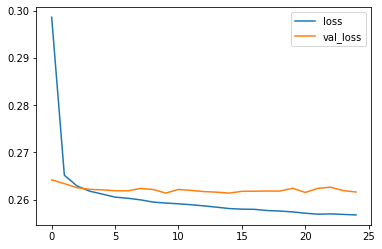

In [774]:
loss1.plot()

In [775]:
#model.fit(x=X_train, 
#           y=y_train, 
#           epochs=25,
#           batch_size=256,
#           validation_data=(X_test, y_test), 
#           )

In [776]:
# losses=pd.DataFrame(model.history.history)
# losses.plot()

In [777]:
from sklearn.metrics import classification_report,confusion_matrix


In [778]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [779]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.94      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [780]:
len(df.columns)

79

In [781]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc',
       'loan_status', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'A2', 'A3', 'A4', 'A5',
       'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2',
       'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4',
       'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT', '05113',
       '11650', '22690', '29597', '

In [783]:
print(confusion_matrix(y_test,predictions))

[[ 6744  8914]
 [   14 63372]]


In [807]:
import random 
random_index=random.randint(0,len(df))
new_customer=df.drop('loan_status',axis=1).iloc[random_index]
new_customer

loan_amnt          12100.00
term                  36.00
int_rate              26.77
installment          492.50
annual_inc         60000.00
                     ...   
48052                  0.00
70466                  0.00
86630                  0.00
93700                  0.00
earlies_cr_year     2010.00
Name: 265641, Length: 78, dtype: float64

In [808]:
new=new_customer.values.reshape(1,78)
(model.predict(new) > 0.5).astype("int32")

array([[1]])

In [809]:
df.iloc[random_index]['loan_status']

1.0